This is a Python program that plots a rectangular diagram for a multi-stage liquid liquid extraction unit to determine its number of ideal steps and the minimum solvent flowrate.

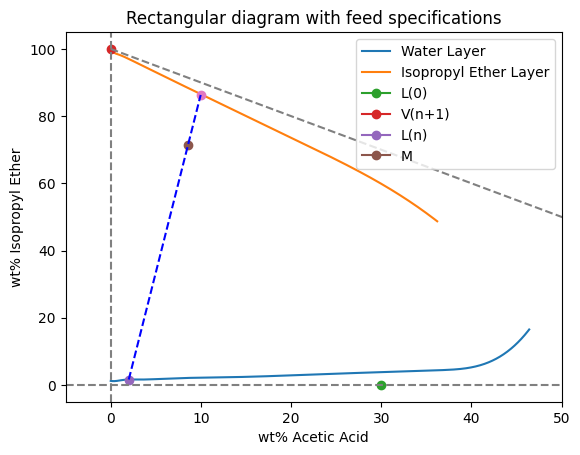

L(n) = (2,1.61), V(1) = (9.97,86.3)


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

xa1 = [0,0.69,1.41,2.89,6.42,13.3,25.5,36.7,44.3,46.4]
xi1 = [1.2,1.2,1.5,1.6,1.9,2.3,3.4,4.4,10.6,16.5]
water = make_interp_spline(xa1, xi1)
wx = np.linspace(0,46.4,1000)
wy = water(wx)

xa2 = [0,0.18,0.37,0.79,1.93,4.82,11.4,21.6,31.1,36.2]
xi2 = [99.4,99.3,98.9,98.4,97.1,93.3,84.7,71.5,58.1,48.7]
ether = make_interp_spline(xa2, xi2)
ex = np.linspace(0,36.2,1000)
ey = ether(ex)

mx = 30*2/7
my = 100*5/7

xan = 2
xin = water(xan)

def extendLine(p1,p2,dir,dx):
    if p1[0] < p2[0]:
        x1,y1 = p1
        x2,y2 = p2
    else:
        x1,y1 = p2
        x2,y2 = p1
    slope = (y2-y1)/(x2-x1)
    inter = y1 - slope*x1
    if dir < 0:
        newx1 = x1-dx
        newy1 = newx1*slope+inter
        return ([newx1,x2],[newy1,y2])
    elif dir > 0:
        newx2 = x2+dx
        newy2 = newx2*slope+inter
        return ([x1,newx2],[y1,newy2])
    else:
        newx1 = x1-dx
        newy1 = newx1*slope+inter
        newx2 = x2+dx
        newy2 = newx2*slope+inter
        return([newx1,newx2],[newy1,newy2])

plt.plot(wx,wy)
plt.plot(ex,ey)
plt.plot(30,0, marker = 'o')
plt.plot(0,100, marker = 'o')
plt.plot(xan,xin, marker = 'o')
plt.plot(mx,my, marker = 'o')

p1,p2 = extendLine((xan,xin),(mx,my),1,1.40)
v1x,v1y = p1[1],p2[1]
plt.plot(v1x,v1y, marker = 'o')
plt.plot(p1,p2,color="blue",linestyle="dashed")

plt.plot([0,100],[100,0],color="grey",linestyle="dashed")
plt.axvline(0,color="grey",linestyle="dashed")
plt.axhline(0,color="grey",linestyle="dashed")
plt.xlim(-5,50)

plt.xlabel("wt% Acetic Acid")
plt.ylabel("wt% Isopropyl Ether")
plt.legend(["Water Layer","Isopropyl Ether Layer","L(0)","V(n+1)","L(n)","M"])
plt.title("Rectangular diagram with feed specifications")
plt.show()

print(f"L(n) = ({xan},{xin:0.2f}), V(1) = ({v1x:0.2f},{v1y:0.1f})")

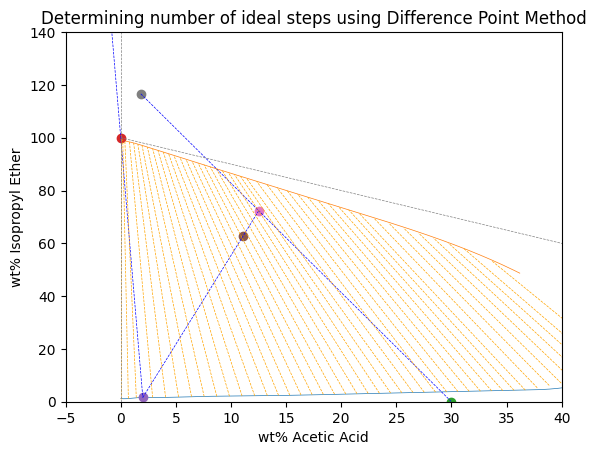

In [12]:
def plotTieLines(maxIdx):
    for idx in range(maxIdx):
        x1 = xa1[idx]
        y1 = xi1[idx]
        x2 = xa2[idx]
        y2 = xi2[idx]
        div = max(int((xa1[idx+1]-x1)//1),1)
        dx1 = (xa1[idx+1]-x1)/div
        dy1 = (xi1[idx+1]-y1)/div
        dx2 = (xa2[idx+1]-x2)/div
        dy2 = (xi2[idx+1]-y2)/div
        for i in range(div):
            plt.plot([x1,x2],[y1,y2],color="orange",linestyle="dashed",linewidth=0.5)
            x1 += dx1
            y1 += dy1
            x2 += dx2
            y2 += dy2

plt.plot(wx,wy,linewidth=0.5)
plt.plot(ex,ey,linewidth=0.5)
plt.plot(30,0, marker = 'o')
plt.plot(0,100, marker = 'o')
plt.plot(xan,xin, marker = 'o')
plt.plot(mx,my, marker = 'o')

p1,p2 = extendLine((xan,xin),(mx,my),1,1.40)
v1x,v1y = p1[1],p2[1]
plt.plot(v1x,v1y, marker = 'o')
plt.plot(p1,p2,color="blue",linestyle="dashed",linewidth=0.5)

p1,p2 = extendLine((xan,xin),(0,100),-1,1)
plt.plot(p1,p2,color="blue",linestyle="dashed",linewidth=0.5)

p1,p2 = extendLine((30,0),(v1x,v1y),-1,10.7)
deltax,deltay = p1[0],p2[0]
plt.plot(deltax,deltay, marker = 'o')
plt.plot(p1,p2,color="blue",linestyle="dashed",linewidth=0.5)

plotTieLines(9)

plt.plot([0,100],[100,0],color="grey",linestyle="dashed",linewidth=0.5)
plt.axvline(0,color="grey",linestyle="dashed",linewidth=0.5)
plt.axhline(0,color="grey",linestyle="dashed",linewidth=0.5)
plt.xlim(-5,40)
plt.ylim(0,140)

plt.xlabel("wt% Acetic Acid")
plt.ylabel("wt% Isopropyl Ether")
#plt.legend(["Water Layer","Isopropyl Ether Layer","L(0)","V(n+1)","L(n)","M"])
plt.title("Determining number of ideal steps using Difference Point Method")
plt.show()

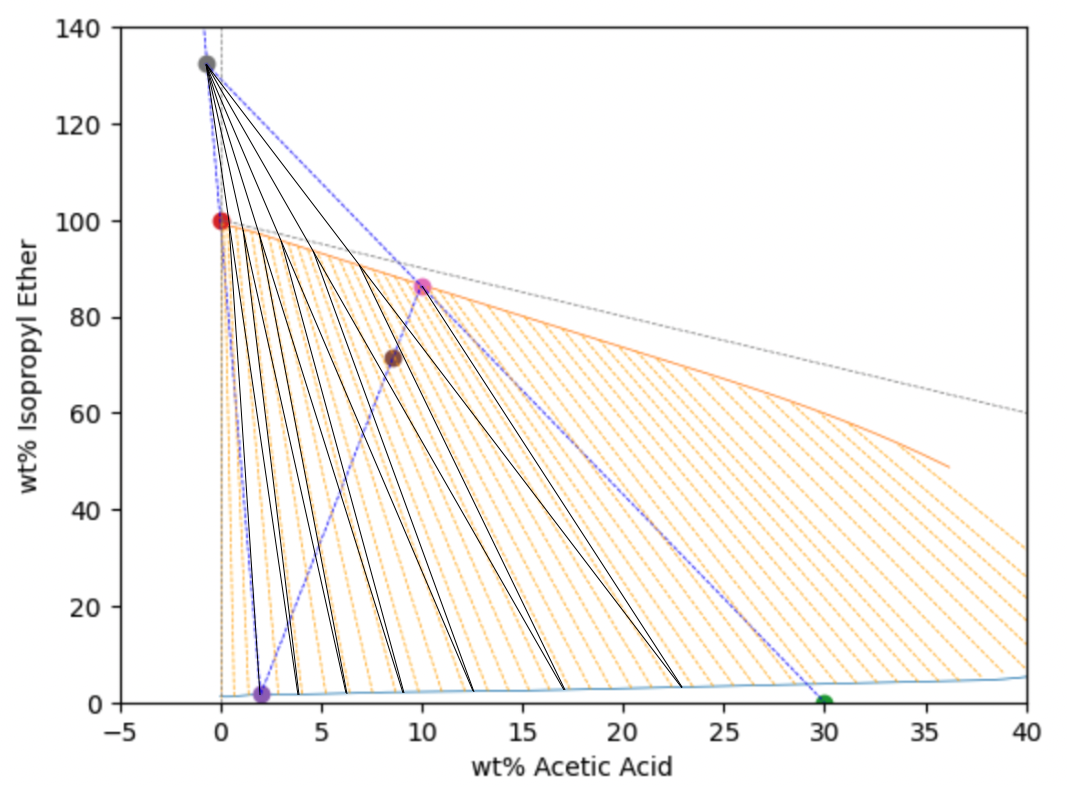

According to the plot above, 7 ideal steps are required to satisfy the specifications.

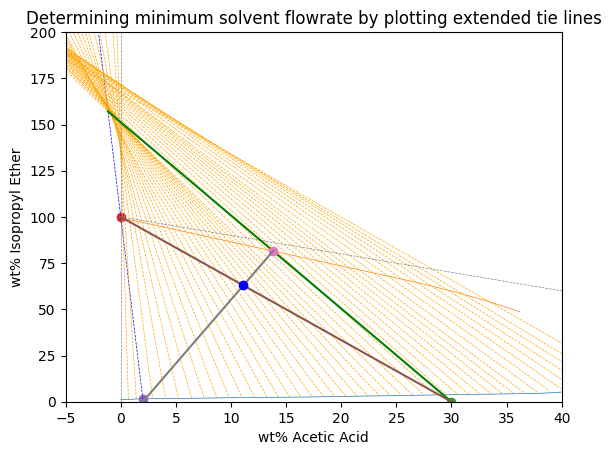

In [16]:
def plotExtendedTieLines(maxIdx):
    for idx in range(maxIdx):
        x1 = xa1[idx]
        y1 = xi1[idx]
        x2 = xa2[idx]
        y2 = xi2[idx]
        div = max(int((xa1[idx+1]-x1)//1),1)
        dx1 = (xa1[idx+1]-x1)/div
        dy1 = (xi1[idx+1]-y1)/div
        dx2 = (xa2[idx+1]-x2)/div
        dy2 = (xi2[idx+1]-y2)/div
        for i in range(div):
            if x1 != x2:
                p1,p2 = extendLine((x1,y1),(x2,y2),-1,x1+3)
                plt.plot(p1,p2,color="orange",linestyle="dashed",linewidth=0.5)
            x1 += dx1
            y1 += dy1
            x2 += dx2
            y2 += dy2

plt.plot(wx,wy,linewidth=0.5)
plt.plot(ex,ey,linewidth=0.5)
plt.plot(30,0, marker = 'o')
plt.plot(0,100, marker = 'o')
plt.plot(xan,xin, marker = 'o')

p1,p2 = extendLine((xan,xin),(0,100),-1,2)
plt.plot(p1,p2,color="blue",linestyle="dashed",linewidth=0.5)

plotExtendedTieLines(9)

plt.plot([0,100],[100,0],color="grey",linestyle="dashed",linewidth=0.5)
plt.axvline(0,color="grey",linestyle="dashed",linewidth=0.5)
plt.axhline(0,color="grey",linestyle="dashed",linewidth=0.5)

deltax = -1.16
deltay = 157.1
plt.plot([deltax,30],[deltay,0],color="green")
plt.plot([0,30],[100,0])

v1x,v1y = 13.82,81.57
plt.plot(v1x,v1y, marker = 'o')
plt.plot([v1x,2],[v1y,0])

mx,my = 11.12,62.93
plt.plot(mx,my, marker = 'o',color="blue")

plt.xlim(-5,40)
plt.ylim(0,200)


plt.xlabel("wt% Acetic Acid")
plt.ylabel("wt% Isopropyl Ether")
#plt.legend(["Water Layer","Isopropyl Ether Layer","L(0)","V(n+1)","L(n)","M"])
plt.title("Determining minimum solvent flowrate by plotting extended tie lines")
plt.show()

In [7]:
ratio = (30-mx)/mx

print(f"According to the plot, V(n+1)/L(0) = {ratio:0.3f}")
print(f"Therefore, minimum solvent flowrate = {ratio*100:0.1f} kg/h")

According to the plot, V(n+1)/L(0) = 1.698
Therefore, minimum solvent flowrate = 169.8 kg/h
